In [ ]:
import os
c.TemplateExporter.template_path = ['.', os.path.expanduser('~/.jupyter/templates/')]

# Задание:

1. Выбрать набор данных (датасет).
2. Создать ноутбук, который содержит следующие разделы:

    * Текстовое описание выбранного Вами набора данных.
    * Основные характеристики датасета.
    * Визуальное исследование датасета.
    * информация о корреляции признаков.


3. Сформировать отчет и разместить его в своем репозитории на github.
    
# 1) Текстовое описание набора данных:
Был выбран датасет из Scikit-learn - ирисы Фишера. 
Наш датасет учебный, в нём нет пропусков. Он используется для классификации ирисов.
Датасет состоит из 5 колонок:
       
<b>Длина и ширина чашелестников</b> соответственно:
   1. sepal length (cm)
   2. sepal width (cm)

<b>Длина и ширина лепестков</b> соответственно:
   3. petal length (cm)
   4. petal width (cm)


   5. target - один из 3-х видов цветка: setosa, versicolor, virginica


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import *
iris = load_iris()

In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# 2) Основные характеристики:

In [4]:
#  Первые 5 строк датасета:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# Размер датасета:
data.shape

(150, 5)

In [6]:
# Датасет изначально без пропусков, можем убедиться в этом: 
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
# Посмотрим типы колонок: 
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [8]:
# Посмотрим статистические характеристики датасета:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Определим уникальные значения для target
data['target'].unique()

array([0., 1., 2.])

# 3) Визуальное исследование датасета

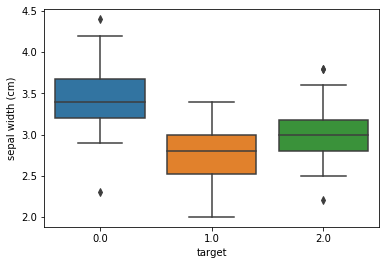

In [10]:
ax = sns.boxplot(x="target", y="sepal width (cm)", data= data)

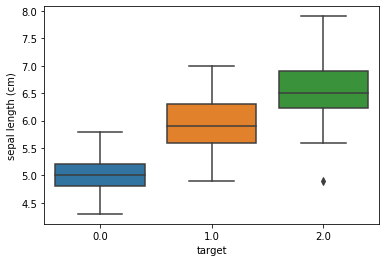

In [11]:
bx = sns.boxplot(x="target", y="sepal length (cm)", data= data)

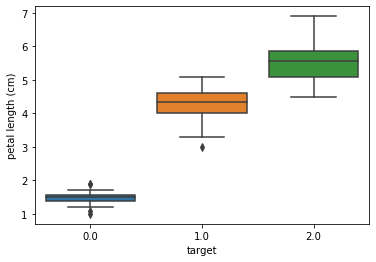

In [12]:
bx = sns.boxplot(x="target", y="petal length (cm)", data= data)

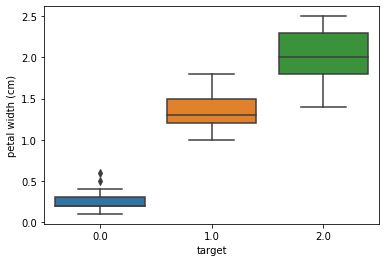

In [13]:
bx = sns.boxplot(x="target", y="petal width (cm)", data= data)

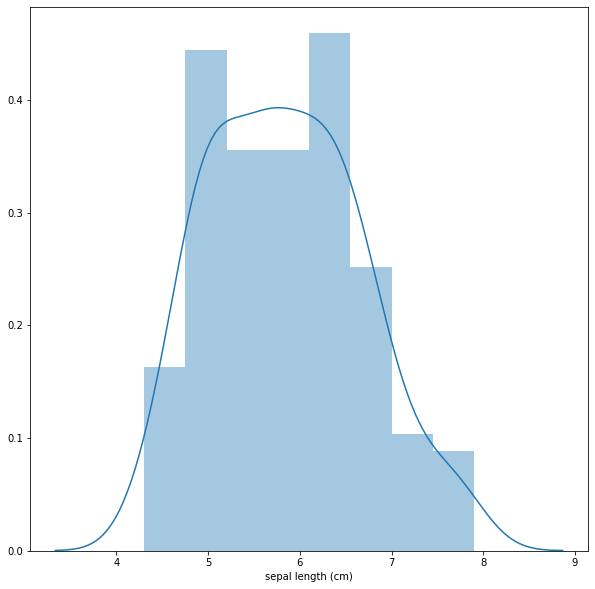

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal length (cm)'])

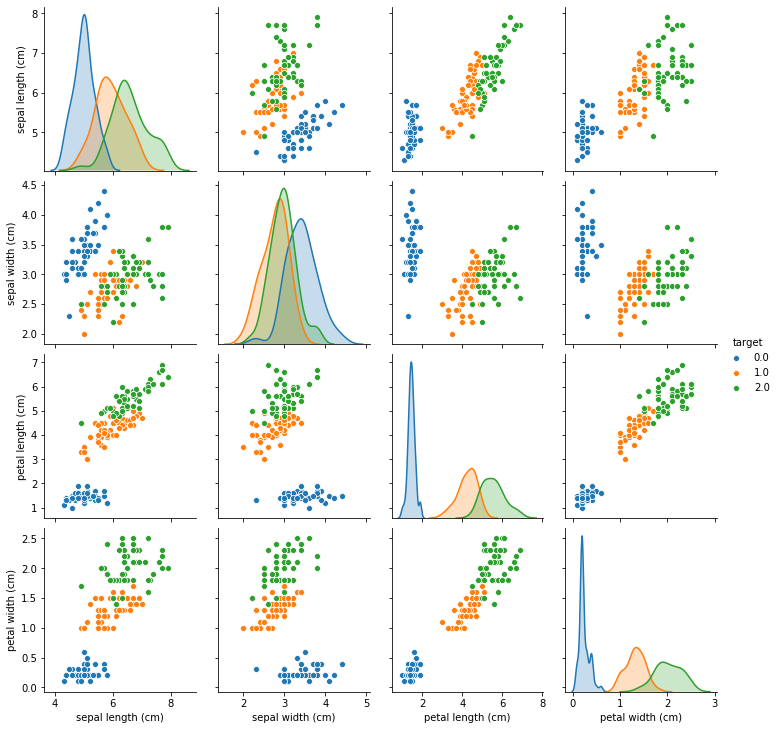

In [15]:
sns.pairplot(data, hue="target")

Судя по графикам можно скорее всего сказать, что Версиколор и Верджиника отличаются достаточно друг от друга, и сильно Сетосы. Можно предположить, что скорее всего Сетоса будет правильно определена с болшей вероятностью, при применении средств классификации наших ирисов.

In [16]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [17]:
data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [18]:
data.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.076997,0.718516,0.655309,0.670444
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal length (cm),0.718516,-0.185994,1.000000,0.806891,0.822911
petal width (cm),0.655309,-0.157126,0.806891,1.000000,0.839687
target,0.670444,-0.337614,0.822911,0.839687,1.000000


In [19]:
data.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
target,0.798078,-0.440290,0.935431,0.938179,1.000000


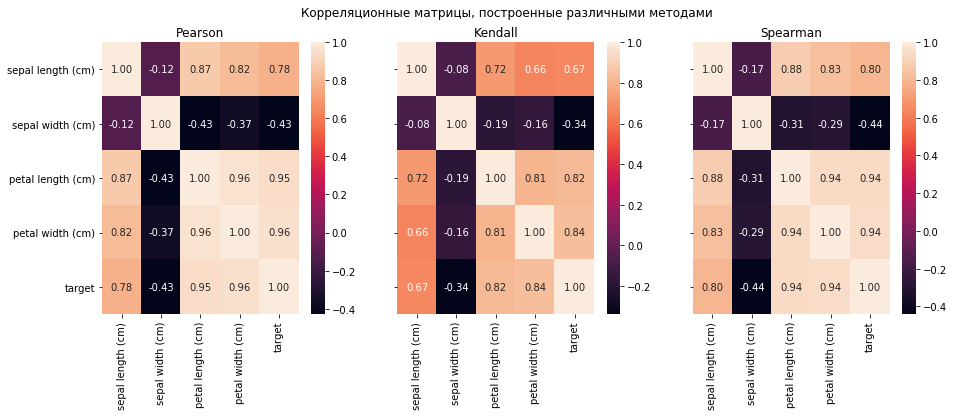

In [20]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Лирину чашелистников можно не включать в модель, потому что коэффициент коореляции с другими признаками мал.